In [1]:
!pip install transformers pandas

In [2]:
# Notebook for Testing NLP Theme Extraction

# Install necessary libraries


from transformers import pipeline
import pandas as pd

# Step 1: Load the NLP Model
print("Loading NLP model for theme extraction...")
nlp_pipeline = pipeline("text-classification", model="distilbert-base-uncased", return_all_scores=True)

# Step 2: Define Sample Inputs
theme_descriptions = [
    "Create a Gothic cathedral with intricate patterns and a dark ambiance.",
    "A serene forest environment with lush greenery and wildlife.",
    "Design a futuristic cityscape with advanced technology and flying cars.",
    "Generate a medieval castle surrounded by a moat and dense fog."
]

# Step 3: Process Descriptions to Extract Themes
def extract_theme(description):
    result = nlp_pipeline(description)
    # Assuming the output is a classification score for different labels (modify as needed)
    return sorted(result[0], key=lambda x: x['score'], reverse=True)[0]['label']

# Step 4: Test Theme Extraction
print("Extracting themes...")
extracted_themes = [extract_theme(desc) for desc in theme_descriptions]

# Step 5: Display Results
data = {'Description': theme_descriptions, 'Extracted Theme': extracted_themes}
df = pd.DataFrame(data)
print(df)

# Optional: Save results
df.to_csv("theme_extraction_results.csv", index=False)


Loading NLP model for theme extraction...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Extracting themes...
                                         Description Extracted Theme
0  Create a Gothic cathedral with intricate patte...         LABEL_0
1  A serene forest environment with lush greenery...         LABEL_0
2  Design a futuristic cityscape with advanced te...         LABEL_1
3  Generate a medieval castle surrounded by a moa...         LABEL_1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 35.0 MB/s eta 0:00:00
Running on: cuda
Loading Stable Diffusion pipeline...


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Generating concept images...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: A Gothic cathedral with dark, intricate patterns and eerie lighting.


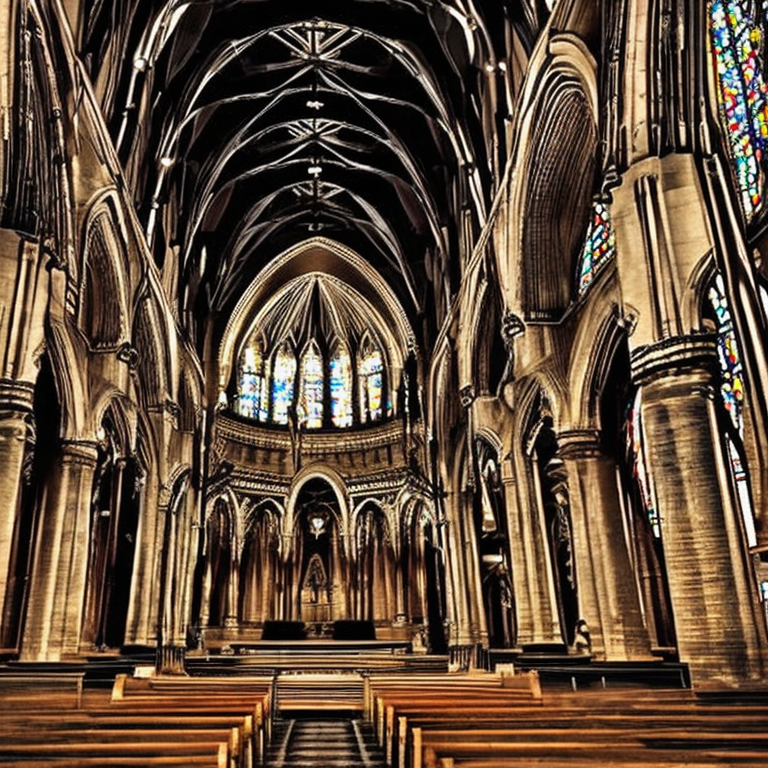

Prompt: A futuristic cityscape with towering skyscrapers and flying cars.


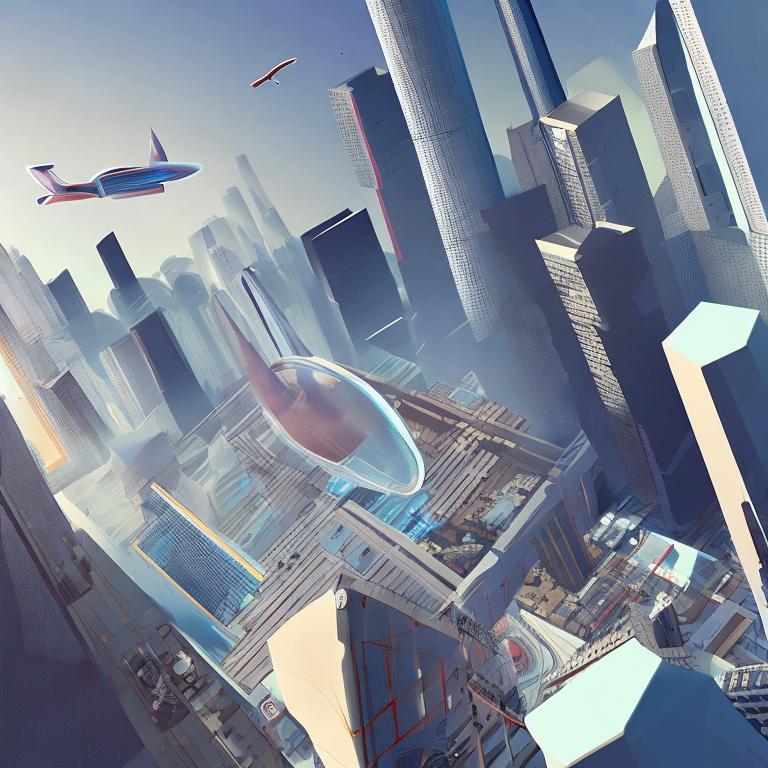

Prompt: A serene forest with sunlight filtering through dense trees and wildlife.


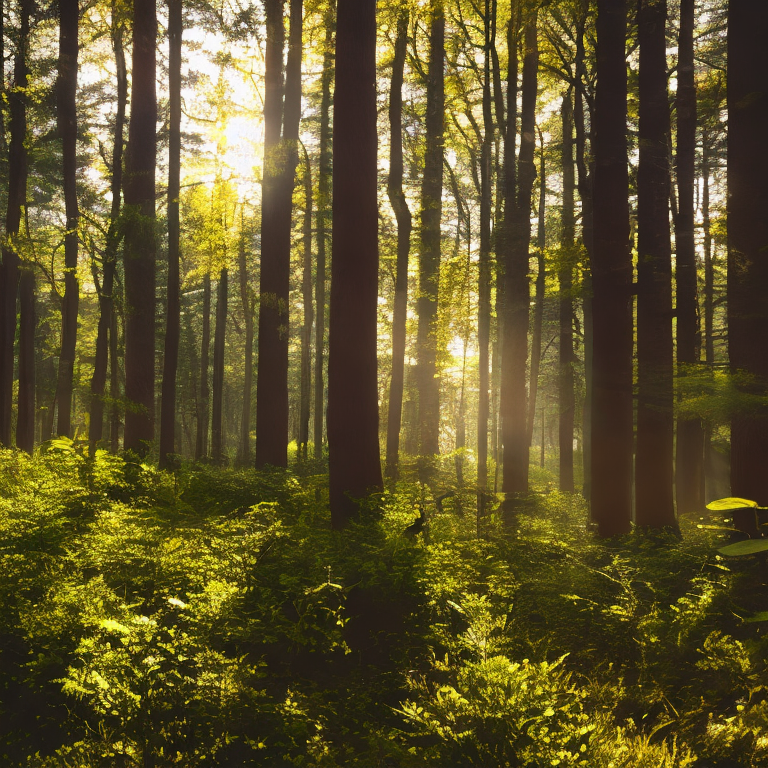

  adding: generated_concepts/ (stored 0%)
  adding: generated_concepts/concept_3.png (deflated 0%)
  adding: generated_concepts/concept_1.png (deflated 0%)
  adding: generated_concepts/concept_2.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Install necessary libraries
!pip install diffusers transformers torch torchvision accelerate
!pip install xformers  # Optional, speeds up diffusion model execution

from diffusers import StableDiffusionPipeline
import torch
import os
from PIL import Image
from google.colab import files

# Enable GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on: {device}")

# Load the Stable Diffusion Pipeline
print("Loading Stable Diffusion pipeline...")
pipeline = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2", torch_dtype=torch.float16)
pipeline.to(device)

# Define Thematic Prompts
thematic_prompts = [
    "A Gothic cathedral with dark, intricate patterns and eerie lighting.",
    "A futuristic cityscape with towering skyscrapers and flying cars.",
    "A serene forest with sunlight filtering through dense trees and wildlife."
]

# Generate Concept Images
output_dir = "generated_concepts"
os.makedirs(output_dir, exist_ok=True)

def generate_concept_images(prompts):
    print("Generating concept images...")
    images = []
    for i, prompt in enumerate(prompts):
        image = pipeline(prompt).images[0]
        output_path = os.path.join(output_dir, f"concept_{i+1}.png")
        image.save(output_path)
        images.append((prompt, output_path))
    return images

# Generate and Display Images
concept_images = generate_concept_images(thematic_prompts)

# Display Generated Images
for prompt, path in concept_images:
    print(f"Prompt: {prompt}")
    display(Image.open(path))

# Download Generated Images
!zip -r generated_concepts.zip generated_concepts
files.download("generated_concepts.zip")
